<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-2-b478a6fd18e5>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import seaborn as sns

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [6]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [7]:
df = pd.read_csv(file_name)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


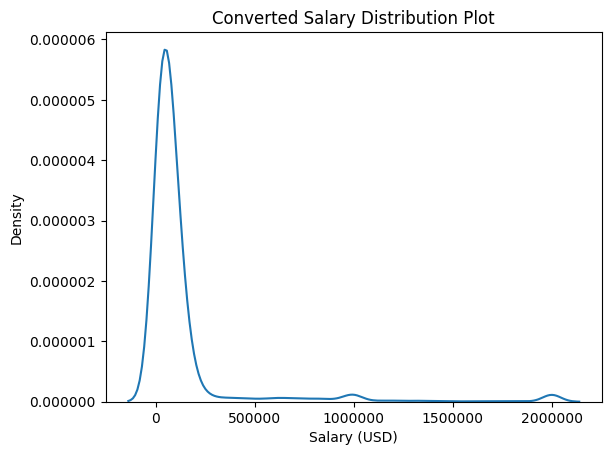

In [8]:
# your code goes here
sns.kdeplot(df['ConvertedComp'])
plt.title('Converted Salary Distribution Plot')
plt.xlabel('Salary (USD)')
plt.ticklabel_format(style='plain')
plt.show()

Plot the histogram for the column `ConvertedComp`.


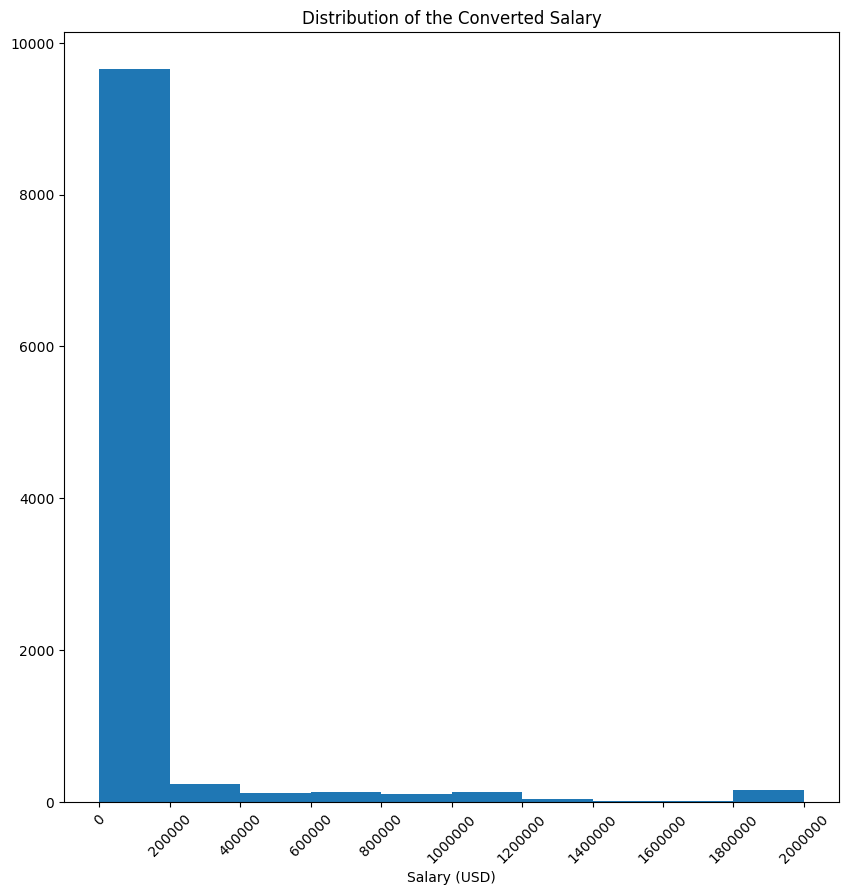

In [9]:
# your code goes here

plt.figure(figsize=(10, 10))
n, bins, patches = plt.hist(df['ConvertedComp'], bins=10)  # You can adjust the number of bins as needed

# Customize the plot with title, labels, and plain style for tick labels
plt.title('Distribution of the Converted Salary')
plt.xlabel('Salary (USD)')
plt.xticks(bins, rotation=45)  # Use the computed `bins` for alignment and rotate if needed
plt.ticklabel_format(style='plain')

plt.show()

What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
print('median of ConvertedComp',df['ConvertedComp'].median())

median of ConvertedComp 57745.0


In [12]:
print('median of Age',df['Age'].median()) #to answer a question from assessment

median of Age 29.0


How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df_man = df.loc[df['Gender'] == 'Man']
len(df_man)

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
df_woman = df.loc[df['Gender'] == 'Woman']
df_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


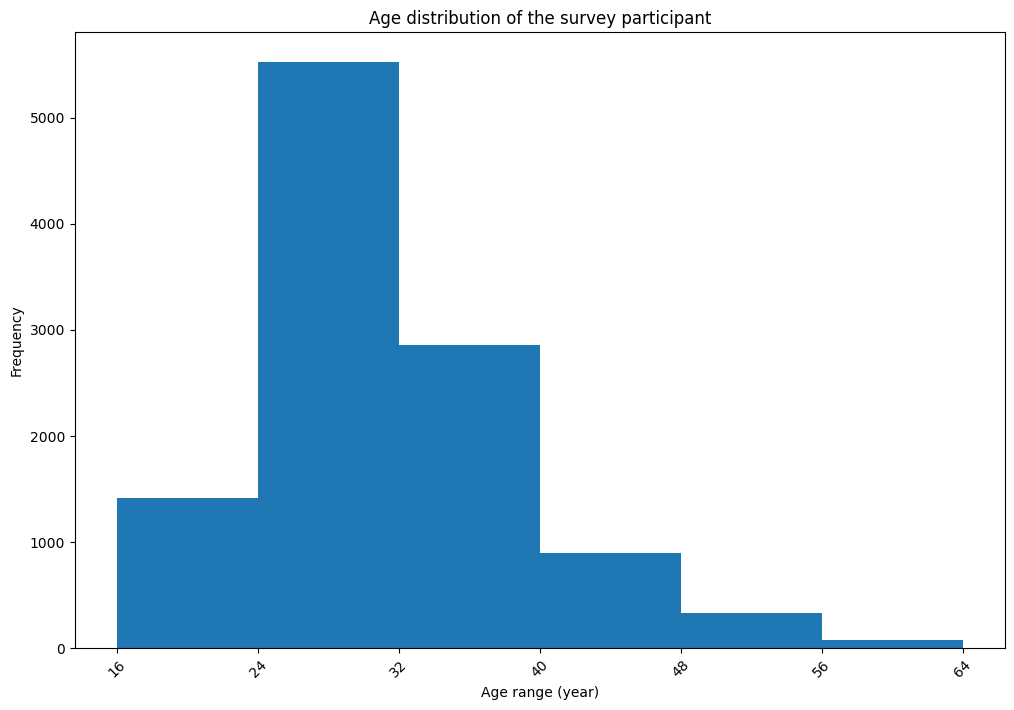

In [16]:
# your code goes here
bin = [16,24,32,40,48,56,64]
df['Age'].plot(kind='hist',figsize = (12,8), xticks=bin, bins = bin)

plt.title('Age distribution of the survey participant')
plt.xlabel('Age range (year)')
plt.xticks(rotation=45)  # Use the computed `bins` for alignment and rotate if needed
plt.ticklabel_format(style='plain')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [17]:
df['ConvertedComp'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min          0.0
25%      26868.0
50%      57745.0
75%     100000.0
max    2000000.0
Name: ConvertedComp, dtype: float64

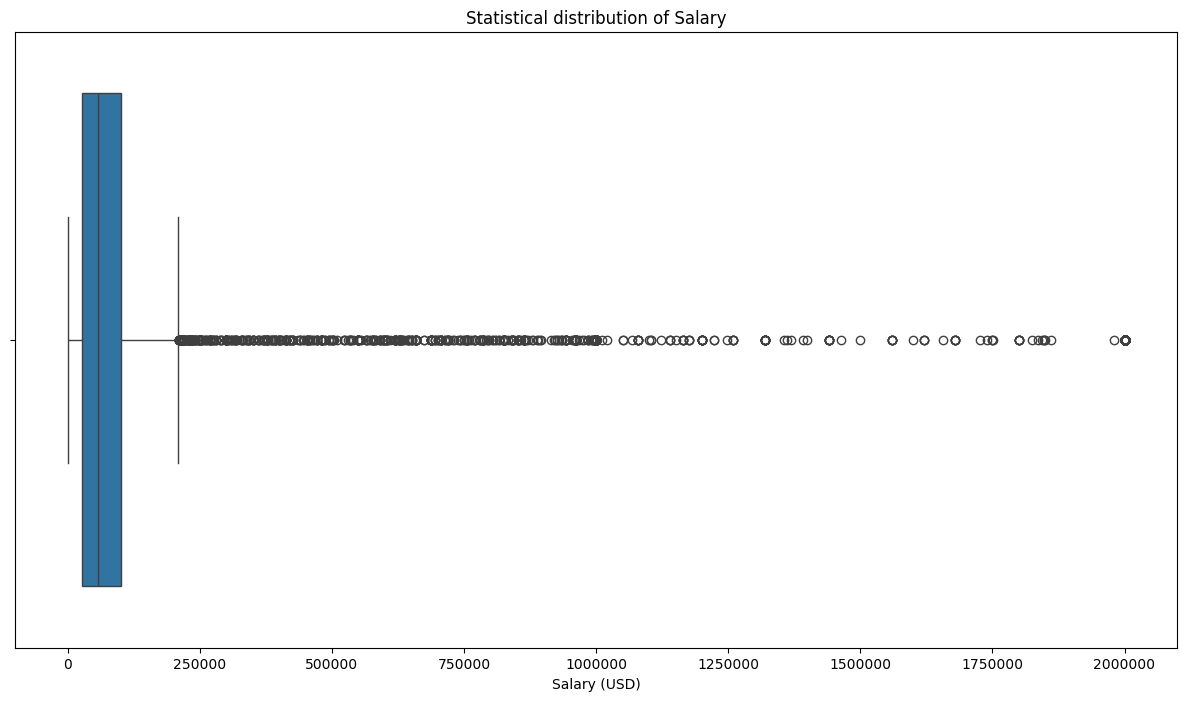

In [12]:
# your code goes here
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=df['ConvertedComp'])
plt.title('Statistical distribution of Salary')
plt.xlabel('Salary (USD)')
#plt.xticks(rotation=45)  # Use the computed `bins` for alignment and rotate if needed
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [65]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

IQR = q3 - q1

57745.0

Find out the upper and lower bounds.


In [70]:
# your code goes here
lower_lim = q1 - 1.5*IQR
upper_lim = q3 + 1.5*IQR

print('lower bounds is:', lower_lim, 'and upper bounds is:', upper_lim)

lower bounds is: -82830.0 and upper bounds is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [74]:
# your code goes here
outliers_15_low = (df['ConvertedComp']<lower_lim)
outliers_15_upper = (df['ConvertedComp']>upper_lim)

df['ConvertedComp'][(outliers_15_low|outliers_15_upper)].count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here
df_ConvertedComp_No_Outliers = df['ConvertedComp'][~(outliers_15_low|outliers_15_upper)]

print('mean after removing outliers: ', df_ConvertedComp_No_Outliers.mean())
print('median after removing outliers: ', df_ConvertedComp_No_Outliers.median())

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [83]:
# your code goes here
corr_matrix = df.corr(numeric_only = True)['Age']
corr_matrix

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
